<a href="https://colab.research.google.com/github/MaInthiyaz/my_projects/blob/main/Exploratory_Data_Analysis_(EDA)_on_Retail_Sales_Data(p1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description:

In this project, you will work with a dataset containing information about retail sales. The goal is
to perform exploratory data analysis (EDA) to uncover patterns, trends, and insights that can
help the retail business make informed decisions.



These libraries are essential:

pandas for data manipulation,

matplotlib & seaborn for plotting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv("retail_sales_dataset.csv")

Data Cleaning

In [4]:
# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [5]:
# Check for missing values
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [10]:
# Drop rows with missing values (if any)
data = data.dropna()

Descriptive Statistics

In [11]:
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
        Transaction ID                           Date         Age     Quantity  \
count     1000.000000                           1000  1000.00000  1000.000000   
mean       500.500000  2023-07-03 00:25:55.200000256    41.39200     2.514000   
min          1.000000            2023-01-01 00:00:00    18.00000     1.000000   
25%        250.750000            2023-04-08 00:00:00    29.00000     1.000000   
50%        500.500000            2023-06-29 12:00:00    42.00000     3.000000   
75%        750.250000            2023-10-04 00:00:00    53.00000     4.000000   
max       1000.000000            2024-01-01 00:00:00    64.00000     4.000000   
std        288.819436                            NaN    13.68143     1.132734   

       Price per Unit  Total Amount  
count     1000.000000   1000.000000  
mean       179.890000    456.000000  
min         25.000000     25.000000  
25%         30.000000     60.000000  
50%         50.000000    135.000000  
75%        300.0

 Time Series Analysis

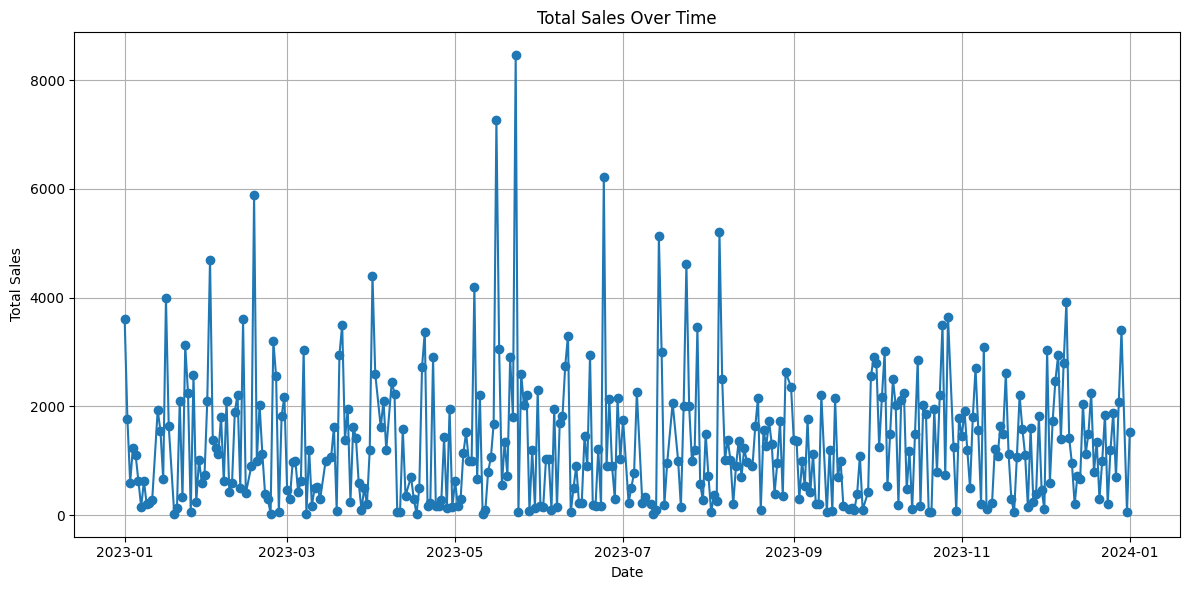

In [12]:
daily_sales = data.groupby('Date')['Total Amount'].sum().reset_index()

plt.figure(figsize=(12,6))
plt.plot(daily_sales['Date'], daily_sales['Total Amount'], marker='o')
plt.title("Total Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

Customer Analysis

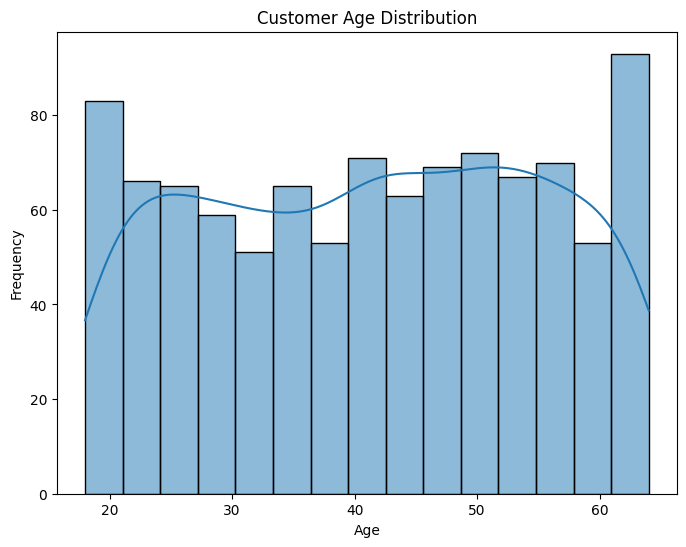

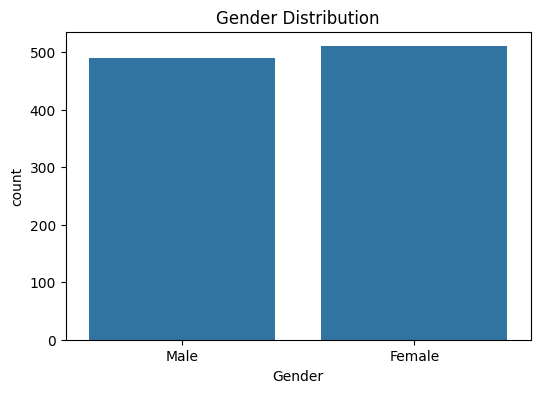

In [13]:
plt.figure(figsize=(8,6))
sns.histplot(data['Age'], bins=15, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=data)
plt.title("Gender Distribution")
plt.show()

 Product Analysis

<ipython-input-14-a1e2180fee62>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Amount', y='Product Category', data=product_sales, palette='viridis')


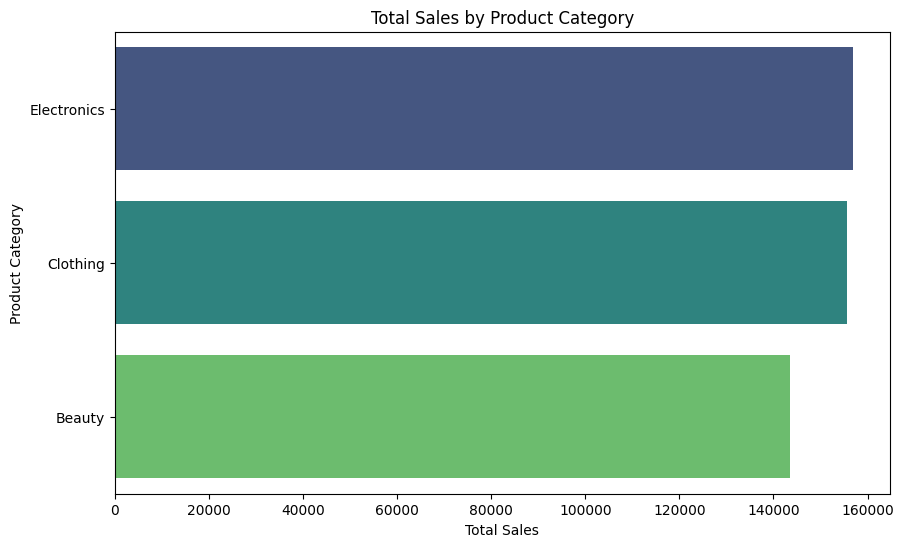

In [14]:
product_sales = data.groupby('Product Category')['Total Amount'].sum().reset_index().sort_values(by='Total Amount', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Total Amount', y='Product Category', data=product_sales, palette='viridis')
plt.title("Total Sales by Product Category")
plt.xlabel("Total Sales")
plt.ylabel("Product Category")
plt.show()

Heatmap: Sales Correlation

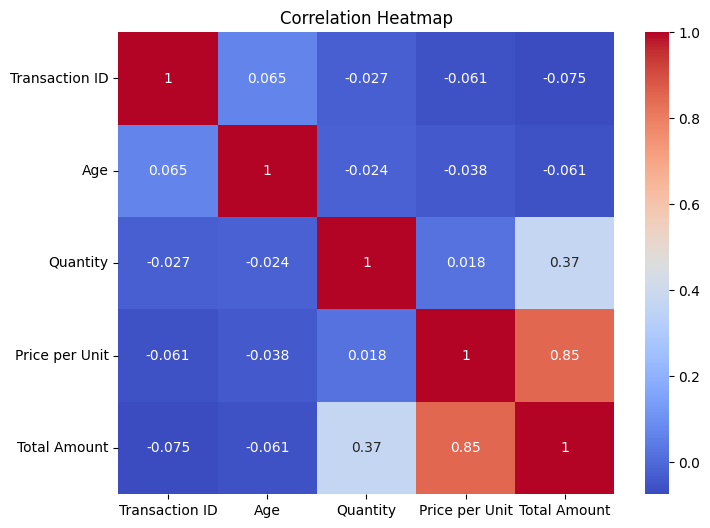

In [16]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Recommendations

In [17]:
print("\n--- Recommendations ---")
print("1. Focus marketing on age groups with the highest purchasing power (based on age distribution).")
print("2. Invest more in high-performing product categories like:", product_sales.iloc[0]['Product Category'])
print("3. Track sales around seasonal peaks or promotions (observed from time series trends).")
print("4. Consider gender-specific marketing based on customer composition.")


--- Recommendations ---
1. Focus marketing on age groups with the highest purchasing power (based on age distribution).
2. Invest more in high-performing product categories like: Electronics
3. Track sales around seasonal peaks or promotions (observed from time series trends).
4. Consider gender-specific marketing based on customer composition.
